In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [232]:
DM=pd.read_csv('../data/omnipath/DSD_conv.csv',sep=',',header=0,index_col=0)

In [233]:
AM=pd.read_csv('../data/omnipath/AM_GC.csv',sep=',',header=0,index_col=0)

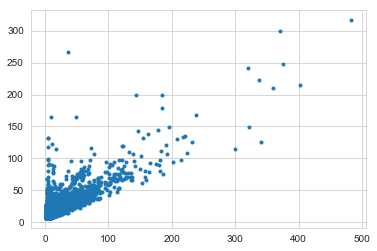

In [243]:
plt.plot(AM.sum(),DM.median(),'.')

In [166]:
DM=np.log2(DM)

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':


In [65]:
kegg=pd.read_csv('../results/genesets/single/csvs/dorothea_AB.csv',sep=',',header=0,index_col=0)

In [66]:
fil=np.in1d(kegg['Gene'],DM.index)

In [67]:
kegg=kegg[fil]

In [102]:
gene_set=kegg['Set'].unique()[9]

In [103]:
fil=kegg['Set']==gene_set
genes=kegg[fil]['Gene'].values

In [104]:
np.median(DM.values[np.triu_indices_from(DM.loc[genes,genes],1)])

3.567737652243567

In [101]:
np.median(DM.values[np.triu_indices_from(DM,1)])

3.6598339562094737

In [105]:
def get_distance_distribution(set_name='KEGG'):
    pass

In [230]:
set_name='dorothea_AB'
gene_sets=pd.read_csv('../results/genesets/single/csvs/%s.csv' % set_name,sep=',',header=0,index_col=0)
#overlap with DM
fil=np.in1d(gene_sets['Gene'],DM.index)
gene_sets=gene_sets[fil]
medians_true=[]
medians_random=[]
for gene_set in gene_sets['Set'].unique():
    fil=gene_sets['Set']==gene_set
    genes=gene_sets[fil]['Gene'].unique()
    if len(genes)>1:
        medians_true+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
        genes=np.random.choice(DM.index,len(genes),False)
        medians_random+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])

In [231]:
#sns.distplot(medians_true)
#sns.distplot(medians_random)
print(np.mean(medians_true),np.mean(medians_random))

3.391658341964466 3.977894085273551


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


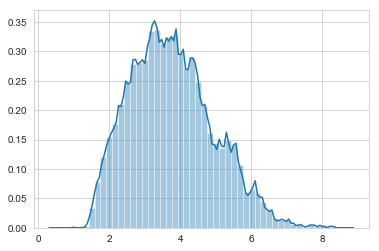

In [177]:
sns.distplot(DM.values[np.triu_indices_from(DM,1)])

In [191]:
DM['EGFR'].sort_values()

source
EGFR           -inf
ERBB2      7.140031
GRB2       7.225613
ERBB3      7.267568
INSR       7.313610
PDGFRB     7.325344
ERBB4      7.326881
KIT        7.332072
MET        7.350328
PIK3R1     7.350366
IGF1R      7.381443
KDR        7.385199
PIK3CA     7.391045
NTRK1      7.398072
FGFR1      7.413797
AXL        7.415217
SHC1       7.417585
PDGFRA     7.420332
NTRK2      7.420872
RET        7.422934
CSF1R      7.425757
EPHB2      7.430519
FLT1       7.434339
FLT3       7.435110
FGFR2      7.438133
TEK        7.438502
EPHA2      7.441933
NTRK3      7.445969
EPHB1      7.452674
MST1R      7.453749
             ...   
RXFP2      7.987510
MAPK1      8.003872
H3C10      8.013131
PCNA       8.014627
CREBBP     8.016494
ESR1       8.022365
SP1        8.028777
HDAC1      8.034930
RELA       8.039483
CHCHD4     8.040778
RB1        8.048594
MAP3K3     8.048970
MAP3K14    8.054246
PRKCA      8.066039
CUL3       8.096415
GSK3B      8.110544
AKT1       8.135083
PLK1       8.141602
IKBKG      8.